In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [2]:
# Load data file
bank=pd.read_csv('fold3.csv')
bank_c=pd.read_csv('fold3c.csv')
bank_c.head()

,SampleID,C,Fold
0,1,Vata,1.0
1,2,Kapha,1.0
2,3,Vata,1.0
3,4,Vata,1.0
4,5,Kapha,1.0


In [3]:
# Make a copy for parsing
question_data = bank.copy()
question_data_c=bank_c.copy()
# Check if the data set contains any null values
#question_data[question_data.isnull().any(axis=1)].count()
question_data_c['C'] = question_data_c['C'].map( {'Vata':0, 'Kapha':1,'Pitta':2} )
# Convert categorical variables to dummies
question_data_original=question_data
question_data_class=question_data_c
question_data.drop('C', axis=1, inplace=True)
question_data.drop('SampleID', axis=1, inplace=True)
question_data_class.drop('SampleID', axis=1, inplace=True)
question_with_dummies = pd.get_dummies(data=question_data)

In [4]:
X_train=question_with_dummies[question_with_dummies['Fold']==1]
X_test=question_with_dummies[question_with_dummies['Fold']==0]
y_train=question_data_class[question_data_class['Fold']==1]
y_train.drop('Fold', axis=1, inplace=True)
y_test=question_data_class[question_data_class['Fold']==0]
y_test.drop('Fold', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


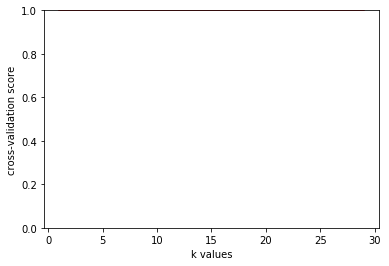

In [6]:
k_range=list(range(1,30))
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()
k_scores=[]
for k in k_range:
    clf = neighbors.KNeighborsClassifier(k, weights='distance')
    clf.fit(X_train, y_train)
    #scores=cross_val_score(clf, X_test, y_test, cv=2)
    scores=clf.score(X_test, y_test)
    k_scores.append(scores.mean())
    #scores=clf.score(X_test, y_test)
  # print(scores)
    #k_scores.append(scores)
print(np.round(k_scores,3)) # to display scores to 3 decimal places
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="red")
plt.xlabel('k values')
plt.ylabel('cross-validation score')
plt.ylim(0,1)
fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig('knn3f_k.png',dpi=200)

In [7]:
from sklearn import neighbors
n_neighbors=18
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)  
## See how the model performs on the test data.
clf.score(X_test, y_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00        11
          2       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        25



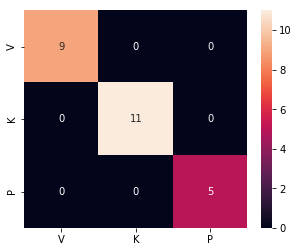

<Figure size 432x288 with 0 Axes>

In [8]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = [i for i in "VKP"],
                  columns = [i for i in "VKP"])
g=plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True)
plt.show()
fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig('knn3fc_k.png',dpi=200)